Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4405/4405 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9748 - loss: 0.0624 - val_accuracy: 0.9977 - val_loss: 0.0075
Epoch 2/1000
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9966 - loss: 0.0087 - val_accuracy: 0.9963 - val_loss: 0.0084
Epoch 3/1000
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9969 - loss: 0.0074 - val_accuracy: 0.9980 - val_loss: 0.0062
Epoch 4/1000
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9971 - loss: 0.0072 - val_accuracy: 0.9976 - val_loss: 0.0062
Epoch 5/1000
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9974 - loss: 0.0063 - val_accuracy: 0.9976 - val_loss: 0.0073
Epoch 6/1000
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9974 - loss: 0.0065 - val_accuracy: 0.9981 - val_loss: 0.0057
Epoch 7/1000
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9973 - loss: 0.0070 - val_accuracy: 0.9956 - val_loss: 0.0114
Epoch 8/1000
4405/4405 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9974 - loss

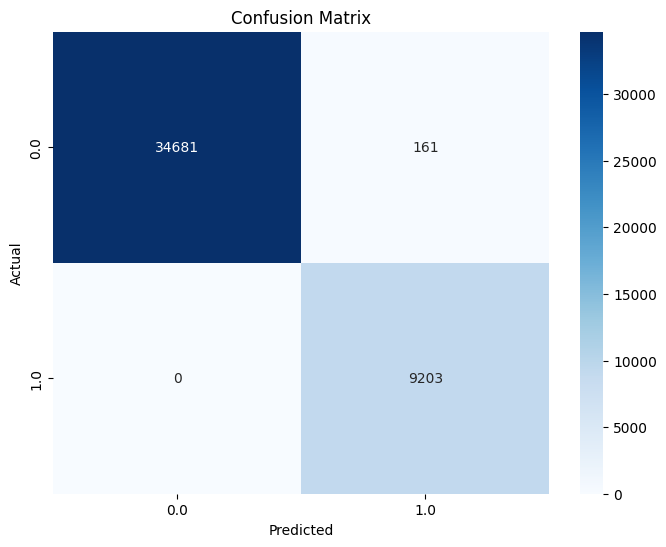

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/ev_data_normalized.csv'
ev_data = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = ev_data.drop(columns=['Electric Vehicle Type'])  # Features
y = ev_data['Electric Vehicle Type']  # Numerical target labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1000), stratify=y)

# Define the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer 1
    Dense(64, activation='relu'),  # Hidden layer 2
    Dense(128, activation='relu'),  # Hidden layer 3
    Dense(64, activation='relu'),  # Hidden layer 4
    Dense(len(np.unique(y)), activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # For numerical labels
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.8f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Compute additional evaluation metrics
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"\nPrecision: {precision:.8f}")
print(f"Recall: {recall:.8f}")
print(f"F1 Score: {f1:.8f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
